In [88]:
import pickle
import pandas as pd
import sklearn.svm
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_pickle("storing_results/trials_test.p")

In [18]:
trials = pickle.load((open("storing_results/trials_test.p")))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [19]:
objects = []
with (open("storing_results/trials_test.p", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
trials = objects[0]

In [80]:
trials = pickle.load(open("storing_results/trials_test.p", "rb"))

In [143]:
df = pd.DataFrame(trials)

In [144]:
df.columns

Index(['state', 'tid', 'spec', 'result', 'misc', 'exp_key', 'owner', 'version',
       'book_time', 'refresh_time'],
      dtype='object')

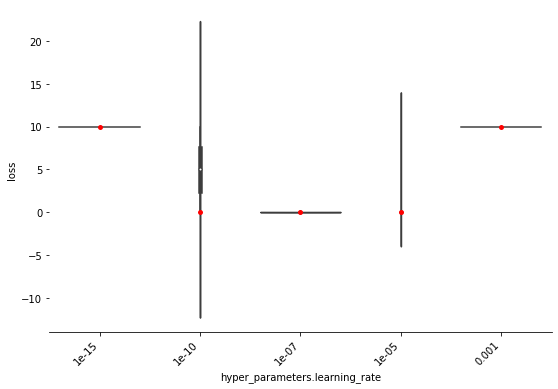

In [176]:
trials = pickle.load(open("storing_results/trials_test.p", "rb"))
df = pd.json_normalize(trials.results)

fig, ax = plt.subplots(figsize=(9, 6))
sns.violinplot(x="hyper_parameters.learning_rate", y="loss", data=df)

minimum = df[["loss", "hyper_parameters.learning_rate"]].groupby('hyper_parameters.learning_rate').min().reset_index()
sns.swarmplot(x = 'hyper_parameters.learning_rate', y='loss', data=minimum,  color='r')

_ = plt.xticks(rotation=45, ha='right')

sns.despine(left=True)

In [178]:
s = "batch_size"
print(df.keys())

Index(['loss', 'status', 'model.lstm:', 'model.ocsvm', 'model.scaler',
       'hyper_parameters.batch_size', 'hyper_parameters.decay_factor',
       'hyper_parameters.dropout', 'hyper_parameters.hidden_dim',
       'hyper_parameters.learning_rate', 'hyper_parameters.min_epochs',
       'hyper_parameters.num_layers', 'hyper_parameters.output_dim',
       'hyper_parameters.svm_gamma', 'hyper_parameters.svm_nu'],
      dtype='object')


In [179]:
key = df.keys()[[s in key for key in df.keys()]][0]

In [195]:
for key in trials.results[0]['hyper_parameters'].keys():
    print(key)

batch_size
decay_factor
dropout
hidden_dim
learning_rate
min_epochs
num_layers
output_dim
svm_gamma
svm_nu


In [182]:
from hyperopt import hp
space = hp.choice(
    "hyper_parameters",
    [
        {
            "batch_size": hp.choice("num_batch", [50, 100, 200]),
            "hidden_dim": hp.choice("hidden_dim", [2, 6, 18]),
            "num_layers": hp.choice("num_layers", [1]),
            "min_epochs": hp.choice("min_epochs", [int(5), int(10), int(20)]),
            "learning_rate": hp.choice(
                "learning_rate", [1e-3, 1e-5, 1e-7, 1e-5, 1e-10, 1e-15]
            ),
            "decay_factor": hp.choice("decay_factor", [0.5, 0.7, 0.8]),
            "dropout": hp.choice("dropout", [0]),  # , 0.2, 0.4, 0.6]),
            "output_dim": hp.choice("output_dim", [1]),
            "svm_nu": hp.choice("svm_nu", [0.05]),  # 0.5 was the default
            "svm_gamma": hp.choice(
                "svm_gamma", ["scale", "auto"]  # Auto seems to give weird results
            ),  # , "scale", , "auto"[ 0.23 was the defeault before]
        }
    ],
)